In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import  OneHotEncoder

# update data to lastest version

In [3]:
path = kagglehub.dataset_download("yasserh/loan-default-dataset")
print("Path to dataset files:", path)
data=pd.read_csv(f'{path}/Loan_Default.csv')

Path to dataset files: /home/axel/.cache/kagglehub/datasets/yasserh/loan-default-dataset/versions/1


In [4]:
data=pd.read_csv(f'{path}/Loan_Default.csv')

# Without prepro

In [5]:
data.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [7]:
data.describe(include='all')

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
count,148670.000000,148670.0,145326,148670,147762,148670,148536,148670,148670,148670,...,148670,148670.000000,148670,148470,148470,133572.000000,148670,148670,148670.000000,124549.000000
unique,NaN,NaN,2,4,2,3,4,2,2,2,...,4,NaN,2,7,2,NaN,4,2,NaN,NaN
top,NaN,NaN,cf,Male,nopre,type1,p3,l1,nopc,nob/c,...,CIB,NaN,CIB,45-54,to_inst,NaN,North,direct,NaN,NaN
freq,NaN,NaN,135348,42346,124621,113173,55934,142344,148114,127908,...,48152,NaN,74392,34720,95814,NaN,74722,148637,NaN,NaN
mean,99224.500000,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,699.789103,NaN,NaN,NaN,72.746457,NaN,NaN,0.246445,37.732932
std,42917.476598,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,115.875857,NaN,NaN,NaN,39.967603,NaN,NaN,0.430942,10.545435
min,24890.000000,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,500.000000,NaN,NaN,NaN,0.967478,NaN,NaN,0.000000,5.000000
25%,62057.250000,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,599.000000,NaN,NaN,NaN,60.474860,NaN,NaN,0.000000,31.000000
50%,99224.500000,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,699.000000,NaN,NaN,NaN,75.135870,NaN,NaN,0.000000,39.000000
75%,136391.750000,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,800.000000,NaN,NaN,NaN,86.184211,NaN,NaN,0.000000,45.000000


In [8]:
data.isnull().sum()/len(data)*100

ID                            0.000000
year                          0.000000
loan_limit                    2.249277
Gender                        0.000000
approv_in_adv                 0.610749
loan_type                     0.000000
loan_purpose                  0.090133
Credit_Worthiness             0.000000
open_credit                   0.000000
business_or_commercial        0.000000
loan_amount                   0.000000
rate_of_interest             24.509989
Interest_rate_spread         24.644515
Upfront_charges              26.664425
term                          0.027578
Neg_ammortization             0.081388
interest_only                 0.000000
lump_sum_payment              0.000000
property_value               10.155378
construction_type             0.000000
occupancy_type                0.000000
Secured_by                    0.000000
total_units                   0.000000
income                        6.154571
credit_type                   0.000000
Credit_Score             

In [9]:
#correlation_matrix = data.corr()

In [10]:
#sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
#plt.title("corrélation")
#plt.show()

In [11]:
df=pd.DataFrame(data["Gender"])
df

,Gender
0,Sex Not Available
1,Male
2,Male
3,Male
4,Joint
...,...
148665,Sex Not Available
148666,Male
148667,Male
148668,Female


In [12]:
df_bis = pd.get_dummies(df, columns=['Gender'])
df_bis

,Gender_Female,Gender_Joint,Gender_Male,Gender_Sex Not Available
0,False,False,False,True
1,False,False,True,False
2,False,False,True,False
3,False,False,True,False
4,False,True,False,False
...,...,...,...,...
148665,False,False,False,True
148666,False,False,True,False
148667,False,False,True,False
148668,True,False,False,False


In [13]:
data_infos=pd.DataFrame({
    #'Colonne': data.columns,
    'Type': data.dtypes.values,
    'Nombre de valeurs uniques': data.nunique().values,
    'Data disponibles': (1-(data.isnull().sum()/len(data)))*100
})
cibles=data_infos[data_infos.Type=='object'].reset_index()
cibles


,index,Type,Nombre de valeurs uniques,Data disponibles
0,loan_limit,object,2,97.750723
1,Gender,object,4,100.000000
2,approv_in_adv,object,2,99.389251
3,loan_type,object,3,100.000000
4,loan_purpose,object,4,99.909867
5,Credit_Worthiness,object,2,100.000000
6,open_credit,object,2,100.000000
7,business_or_commercial,object,2,100.000000
8,Neg_ammortization,object,2,99.918612
9,interest_only,object,2,100.000000


In [14]:
cibles.iloc[:,0]

0                    loan_limit
1                        Gender
2                 approv_in_adv
3                     loan_type
4                  loan_purpose
5             Credit_Worthiness
6                   open_credit
7        business_or_commercial
8             Neg_ammortization
9                 interest_only
10             lump_sum_payment
11            construction_type
12               occupancy_type
13                   Secured_by
14                  total_units
15                  credit_type
16     co-applicant_credit_type
17                          age
18    submission_of_application
19                       Region
20                Security_Type
Name: index, dtype: object

In [15]:
data_bin=data
#cibles.iloc[1,2]
for cat in range(0,len(cibles)): #cibles.iloc[:,0]:
    if cibles.iloc[cat,2] > 2:
        data_bin= pd.get_dummies(data_bin, columns=[cibles.iloc[cat,0]], prefix=cibles.iloc[cat,0])
        print (f'{cat+1}/{len(cibles)} // {cibles.iloc[cat,0]} // dummies')
    else:
        data_bin[cibles.iloc[cat,0]]=data_bin[cibles.iloc[cat,0]]==data_bin[cibles.iloc[cat,0]][1]
        print (f'{cat+1}/{len(cibles)} // {cibles.iloc[cat,0]} // binary')

1/21 // loan_limit // binary
2/21 // Gender // dummies
3/21 // approv_in_adv // binary
4/21 // loan_type // dummies
5/21 // loan_purpose // dummies
6/21 // Credit_Worthiness // binary
7/21 // open_credit // binary
8/21 // business_or_commercial // binary
9/21 // Neg_ammortization // binary
10/21 // interest_only // binary
11/21 // lump_sum_payment // binary
12/21 // construction_type // binary
13/21 // occupancy_type // dummies
14/21 // Secured_by // binary
15/21 // total_units // dummies
16/21 // credit_type // dummies
17/21 // co-applicant_credit_type // binary
18/21 // age // dummies
19/21 // submission_of_application // binary
20/21 // Region // dummies
21/21 // Security_Type // binary


In [16]:
data_bin.shape

(148670, 59)

In [17]:
data_bin.head()

,ID,year,loan_limit,approv_in_adv,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,...,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74,Region_North,Region_North-East,Region_central,Region_south
0,24890,2019,True,True,True,True,False,116500,NaN,NaN,...,False,False,False,False,False,False,False,False,False,True
1,24891,2019,True,True,True,True,True,206500,NaN,NaN,...,False,False,True,False,False,False,True,False,False,False
2,24892,2019,True,False,True,True,False,406500,4.56,0.2000,...,True,False,False,False,False,False,False,False,False,True
3,24893,2019,True,True,True,True,False,456500,4.25,0.6810,...,False,True,False,False,False,False,True,False,False,False
4,24894,2019,True,False,True,True,False,696500,4.00,0.3042,...,False,False,False,False,False,False,True,False,False,False


In [18]:
data_bin.columns

Index(['ID', 'year', 'loan_limit', 'approv_in_adv', 'Credit_Worthiness',
       'open_credit', 'business_or_commercial', 'loan_amount',
       'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term',
       'Neg_ammortization', 'interest_only', 'lump_sum_payment',
       'property_value', 'construction_type', 'Secured_by', 'income',
       'Credit_Score', 'co-applicant_credit_type', 'submission_of_application',
       'LTV', 'Security_Type', 'Status', 'dtir1', 'Gender_Female',
       'Gender_Joint', 'Gender_Male', 'Gender_Sex Not Available',
       'loan_type_type1', 'loan_type_type2', 'loan_type_type3',
       'loan_purpose_p1', 'loan_purpose_p2', 'loan_purpose_p3',
       'loan_purpose_p4', 'occupancy_type_ir', 'occupancy_type_pr',
       'occupancy_type_sr', 'total_units_1U', 'total_units_2U',
       'total_units_3U', 'total_units_4U', 'credit_type_CIB',
       'credit_type_CRIF', 'credit_type_EQUI', 'credit_type_EXP', 'age_25-34',
       'age_35-44', 'age_45-54', 'age

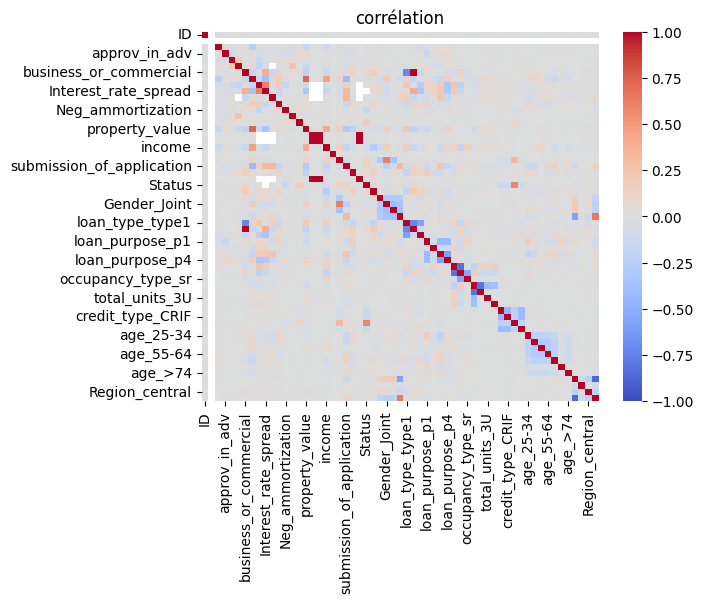

In [19]:
correlation_matrix = data_bin.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("corrélation")
plt.show()

In [20]:
correlation_matrix["Status"].sort_values(ascending=False)*100

Status                       100.000000
credit_type_EQUI              59.216757
lump_sum_payment              18.775218
co-applicant_credit_type      14.423898
submission_of_application     11.739130
loan_type_type2                9.254979
business_or_commercial         9.254979
dtir1                          7.808307
Gender_Sex Not Available       5.333589
Region_south                   4.005089
LTV                            3.889547
approv_in_adv                  3.606160
loan_purpose_p2                2.936932
occupancy_type_ir              2.824918
age_>74                        2.802118
total_units_2U                 2.297751
rate_of_interest               2.295707
Gender_Male                    2.265293
age_65-74                      2.066451
Region_central                 1.673790
total_units_3U                 1.645978
loan_purpose_p1                1.572768
age_55-64                      1.525727
Region_North-East              1.231986
open_credit                    0.997868


In [21]:
correlation_matrix["approv_in_adv"].abs().sort_values(ascending=False)*100

approv_in_adv                100.000000
loan_purpose_p1               14.900459
loan_purpose_p4                8.675936
submission_of_application      8.246691
Neg_ammortization              8.211110
Interest_rate_spread           6.360639
Credit_Worthiness              6.355761
lump_sum_payment               6.251180
rate_of_interest               6.018741
loan_limit                     5.640886
interest_only                  5.573595
property_value                 5.339382
loan_purpose_p3                4.162568
Status                         3.606160
LTV                            3.170604
loan_amount                    3.136371
age_25-34                      2.451901
term                           2.291271
occupancy_type_sr              1.932407
Upfront_charges                1.871232
credit_type_EQUI               1.789329
age_<25                        1.407184
dtir1                          1.405625
income                         1.381068
co-applicant_credit_type       1.166426


In [22]:
abs_corr = data_bin.corr().abs() #editing abs corr matrix
np.fill_diagonal(abs_corr.values, np.nan) #change diagonal data = NaN

In [23]:
top_corr = abs_corr.unstack().dropna().sort_values(ascending=False).head(40)
print(top_corr)

construction_type         Security_Type               1.000000
Security_Type             construction_type           1.000000
loan_type_type2           business_or_commercial      1.000000
Secured_by                Security_Type               1.000000
                          construction_type           1.000000
construction_type         Secured_by                  1.000000
business_or_commercial    loan_type_type2             1.000000
Security_Type             Secured_by                  1.000000
Region_south              Region_North                0.874141
Region_North              Region_south                0.874141
occupancy_type_pr         occupancy_type_ir           0.828007
occupancy_type_ir         occupancy_type_pr           0.828007
total_units_2U            total_units_1U              0.819245
total_units_1U            total_units_2U              0.819245
loan_amount               property_value              0.734249
property_value            loan_amount                 0

# With Gilian prepros

In [24]:
#import package_folder.preprocessor
#from package_folder.preprocessor import clear_data
#from package_folder.preprocessor import encode_categorical
#from package_folder.preprocessor import knn_impute
#from package_folder.preprocessor import tree_imputation

In [25]:
#

In [26]:
path = kagglehub.dataset_download("yasserh/loan-default-dataset")
print("Path to dataset files:", path)
data=pd.read_csv(f'{path}/Loan_Default.csv')

#clean data
    # Drop duplicate rows
data = data.drop_duplicates()

    # Remove columns with more than 25% missing values
missing_percentage = data.isnull().sum() / len(data) * 100
data = data.loc[:, missing_percentage <= 25]

    # Remove samples with more than 5 missing values
data['missing_count'] = data.isnull().sum(axis=1)
data = data[data['missing_count'] <= 5]
data = data.drop(columns=['missing_count'])

print("Data cleaned successfully.")

# Encode categorical variables
# Encode categorical features using OneHotEncoder for categorical variables
cat_cols = data.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit and transform categorical columns
encoded_data = pd.DataFrame(encoder.fit_transform(data[cat_cols]), columns=encoder.get_feature_names_out(cat_cols))

# Drop original categorical columns and concatenate the encoded data
data = data.drop(cat_cols, axis=1).reset_index(drop=True)
data = pd.concat([data, encoded_data], axis=1)

print("Categorical variables encoded successfully.")


Path to dataset files: /home/axel/.cache/kagglehub/datasets/yasserh/loan-default-dataset/versions/1
Data cleaned successfully.
Categorical variables encoded successfully.


In [27]:
data.shape

(148134, 77)

In [28]:
data.head()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,term,property_value,income,Credit_Score,LTV,...,age_nan,submission_of_application_not_inst,submission_of_application_to_inst,submission_of_application_nan,Region_North,Region_North-East,Region_central,Region_south,Security_Type_Indriect,Security_Type_direct
0,24890,2019,116500,NaN,NaN,360.0,118000.0,1740.0,758,98.728814,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,24891,2019,206500,NaN,NaN,360.0,NaN,4980.0,552,NaN,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,24892,2019,406500,4.56,0.2000,360.0,508000.0,9480.0,834,80.019685,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,24893,2019,456500,4.25,0.6810,360.0,658000.0,11880.0,587,69.376900,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,24894,2019,696500,4.00,0.3042,360.0,758000.0,10440.0,602,91.886544,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


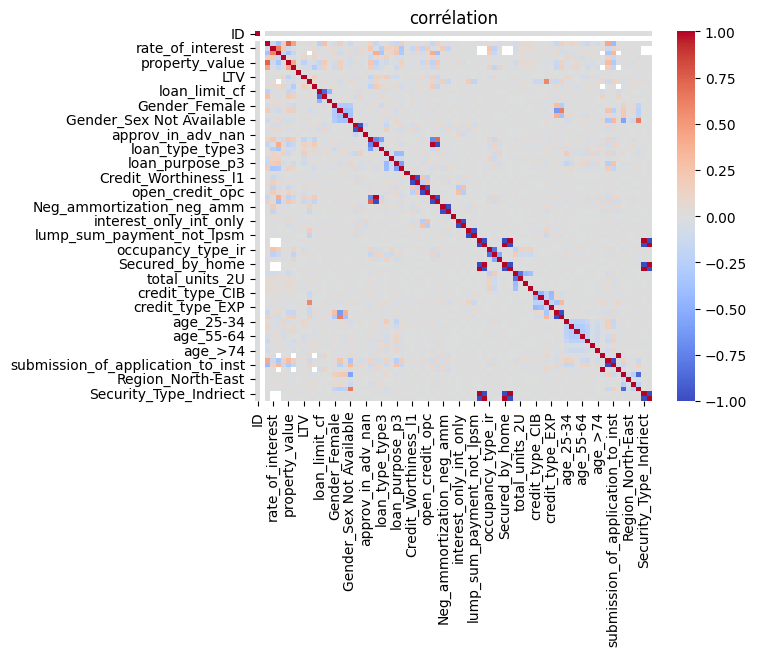

In [29]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("corrélation")
plt.show()

In [30]:
abs_corr = data.corr().abs() #editing abs corr matrix
np.fill_diagonal(abs_corr.values, np.nan) #change diagonal data = NaN
top_corr = abs_corr.unstack().dropna().sort_values(ascending=False)
top_corr.head(10)

co-applicant_credit_type_CIB  co-applicant_credit_type_EXP    1.0
co-applicant_credit_type_EXP  co-applicant_credit_type_CIB    1.0
Security_Type_direct          Secured_by_land                 1.0
                              construction_type_mh            1.0
Security_Type_Indriect        construction_type_sb            1.0
                              Secured_by_home                 1.0
construction_type_sb          construction_type_mh            1.0
construction_type_mh          construction_type_sb            1.0
Secured_by_home               Security_Type_Indriect          1.0
construction_type_mh          Secured_by_home                 1.0
dtype: float64

In [31]:
top_corr.sort_values(ascending=False).head(29)

co-applicant_credit_type_CIB  co-applicant_credit_type_EXP    1.0
co-applicant_credit_type_EXP  co-applicant_credit_type_CIB    1.0
Security_Type_direct          construction_type_mh            1.0
                              Secured_by_land                 1.0
Security_Type_Indriect        construction_type_sb            1.0
Secured_by_home               construction_type_mh            1.0
construction_type_sb          construction_type_mh            1.0
construction_type_mh          Secured_by_home                 1.0
Secured_by_home               Security_Type_Indriect          1.0
construction_type_mh          construction_type_sb            1.0
Security_Type_Indriect        Secured_by_home                 1.0
Secured_by_home               Secured_by_land                 1.0
Credit_Worthiness_l2          Credit_Worthiness_l1            1.0
Security_Type_direct          Security_Type_Indriect          1.0
Security_Type_Indriect        Security_Type_direct            1.0
Credit_Wor

In [32]:
correlation_matrix["Status"].abs().sort_values(ascending=False)*100

Status                       100.000000
credit_type_EQUI              58.600163
lump_sum_payment_not_lpsm     18.967408
lump_sum_payment_lpsm         18.967408
Neg_ammortization_neg_amm     14.932475
                                ...    
Neg_ammortization_nan          0.201623
ID                             0.162425
term                           0.103441
year                                NaN
Interest_rate_spread                NaN
Name: Status, Length: 77, dtype: float64

In [33]:
sup_corr=[]
correl = data.corr().abs()
np.fill_diagonal(correl.values, np.nan) #change diagonal data = NaN
correl = pd.DataFrame(correl.unstack().dropna().sort_values(ascending=False)).reset_index()

for row in range(0,len(correl)):
    #print(correlation_matrix.iloc[row,2])
    if correl.iloc[row,2] >0.99 :
#print(correl.iat[55,2])
        sup_corr.append(correl.iloc[row,1])

data=data.drop(columns=sup_corr)
#data=data.drop(columns="Credit_Worthiness_l2")

sup_corr
correl

,level_0,level_1,0
0,co-applicant_credit_type_CIB,co-applicant_credit_type_EXP,1.000000
1,co-applicant_credit_type_EXP,co-applicant_credit_type_CIB,1.000000
2,Security_Type_direct,Secured_by_land,1.000000
3,Security_Type_direct,construction_type_mh,1.000000
4,Security_Type_Indriect,construction_type_sb,1.000000
...,...,...,...
5657,occupancy_type_ir,credit_type_EQUI,0.000017
5658,Gender_Male,Credit_Score,0.000010
5659,Credit_Score,Gender_Male,0.000010
5660,approv_in_adv_pre,ID,0.000002


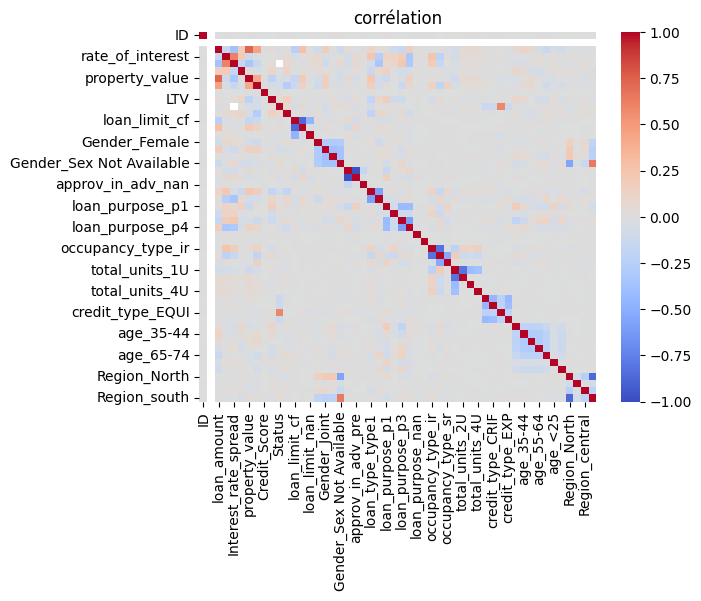

In [34]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("corrélation")
plt.show()

In [35]:
abs_corr = data.corr().abs() #editing abs corr matrix
np.fill_diagonal(abs_corr.values, np.nan) #change diagonal data = NaN
top_corr = abs_corr.unstack().dropna().sort_values(ascending=False)
top_corr.head(10)

approv_in_adv_nopre  approv_in_adv_pre      0.979722
approv_in_adv_pre    approv_in_adv_nopre    0.979722
Region_North         Region_south           0.874200
Region_south         Region_North           0.874200
loan_limit_ncf       loan_limit_cf          0.868378
loan_limit_cf        loan_limit_ncf         0.868378
occupancy_type_ir    occupancy_type_pr      0.827968
occupancy_type_pr    occupancy_type_ir      0.827968
total_units_1U       total_units_2U         0.819175
total_units_2U       total_units_1U         0.819175
dtype: float64

In [36]:
sup_corr=[]
correl = data.corr().abs()
np.fill_diagonal(correl.values, np.nan) #change diagonal data = NaN
correl = pd.DataFrame(correl.unstack().dropna().sort_values(ascending=False)).reset_index()
correl=correl.drop_duplicates(subset=0)
#correl = correl[~correl.duplicated(subset=[0], keep=False)]
correl.head(29)

,level_0,level_1,0
0,approv_in_adv_nopre,approv_in_adv_pre,0.979722
2,Region_North,Region_south,0.874200
4,loan_limit_ncf,loan_limit_cf,0.868378
6,occupancy_type_ir,occupancy_type_pr,0.827968
8,total_units_1U,total_units_2U,0.819175
10,property_value,loan_amount,0.734213
12,Region_south,Gender_Sex Not Available,0.647737
14,rate_of_interest,Interest_rate_spread,0.614908
16,loan_purpose_p4,loan_purpose_p3,0.594052
18,loan_type_type1,loan_type_type3,0.592626


# visualisation